In [1]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity 
from qiskit.tools.visualization import plot_histogram

from qiskit import *
IBMQ.load_accounts(hub=None)
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.ibmq import least_busy

In [ ]:
'''
Grover Algorithm with an user implementation of Toffoli Gate.
'''

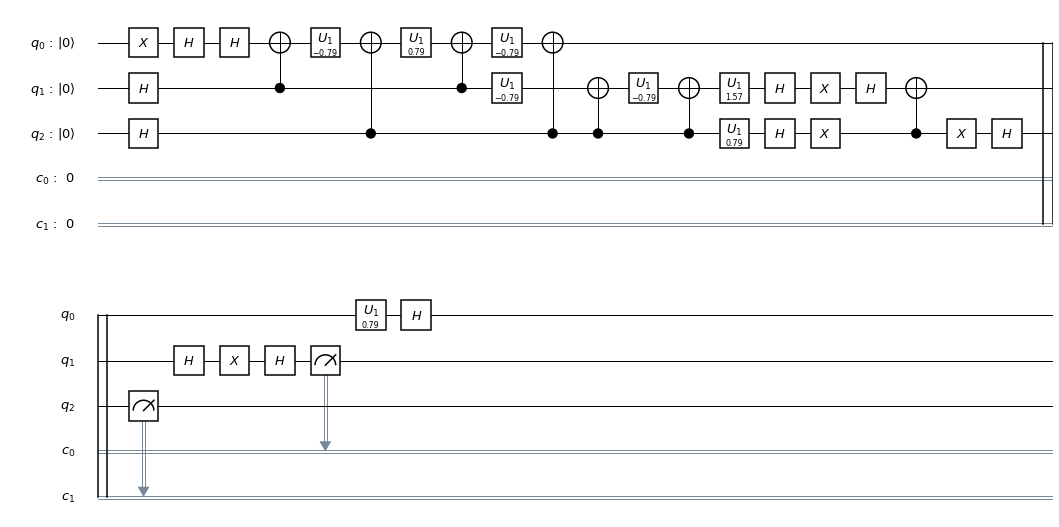

In [2]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(2, 'c')

circ = QuantumCircuit()
circ.add_register(q)
circ.add_register(c)

circ.x(q[0])
circ.h(q[1])
circ.h(q[2])

circ.h(q[0])
circ.h(q[0])

circ.cx(q[1],q[0])
circ.u1(-pi/4,q[0])

circ.cx(q[2],q[0])
circ.u1(pi/4,q[0])

circ.cx(q[1],q[0])
circ. u1(-pi/4,q[0])

circ.cx(q[2],q[0])
circ.u1(pi/4,q[0])
circ.u1(-pi/4,q[1])

circ.h(q[0])

circ.cx(q[2],q[1])
circ.u1(-pi/4,q[1])

circ.cx(q[2],q[1])
circ.u1(pi/2,q[1])
circ.u1(pi/4,q[2])

circ.h(q[1])
circ.h(q[2])

circ.x(q[1])
circ.x(q[2])

circ.h(q[1])
circ.cx(q[2],q[1])
circ.h(q[1])

circ.x(q[1])
circ.x(q[2])

circ.h(q[1])
circ.h(q[2])


circ.measure(q[1], c[0])
circ.measure(q[2], c[1])

circ.draw(output='mpl')

{'11': 1024}


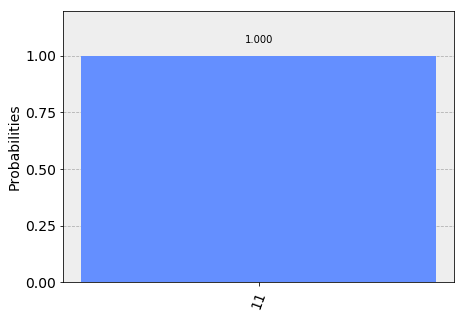

In [3]:
backend_sim = BasicAer.get_backend('qasm_simulator')
result = execute(circ, backend_sim).result()
counts = result.get_counts(circ)
print(counts)

plot_histogram(counts)

In [8]:
backend = least_busy(IBMQ.backends(filters=lambda x: not x.configuration().simulator))
backend.name()

'ibmqx4'

In [5]:
job1 = execute(circ, backend)

In [6]:
job_monitor(job1)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

{'01': 120, '00': 106, '11': 648, '10': 150}


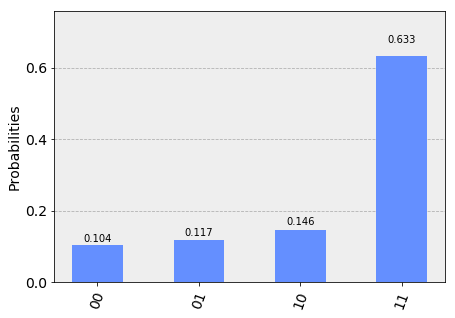

In [7]:
result1 = job1.result()
counts1 = result1.get_counts(circ)
print(counts1)

plot_histogram(counts1)